# Project: Online Retail Exploratory Data Analysis with Python

## Case Study
In this project, I will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. My goal is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, it is expected to identify patterns, outliers, and correlations in the data, allowing me to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, it is expected to uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Gain valuable insights from the data
2. Visualize the data to provide better presentation
3. Suggest data-driven suggestions for the retail company

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011.

## 1. Load the Data

In [13]:
# installing necessary Python libraries

!pip install pandas numpy matplotlib seaborn

In [15]:
# importing necessary Python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# load the dataset into a Pandas DataFrame
df = pd.read_excel('Online Retail.xlsx')

In [19]:
# Take a look on the first few rows of the data
df.head(6)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom


### The dataset above contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## 2. Data Cleaning
- 2.1 Handling missing values
- 2.2 Removing duplicate rows

### 2.1 Handling missing values

In [21]:
# display information about the dataframe
df.info()

# display the summary statistics for numerical columns
print('\nStatistical Summary')
df.describe()

# display the quantity the missing values
print('\nQuantity of Missing Values')
missing_values = df.isnull().sum()
print(missing_values)

# Calculate percentage of missing values in each column
print('\nPercentage of Missing Values')
missing_percentage = (missing_values / len(df)) * 100
print(missing_percentage)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB

Statistical Summary

Quantity of Missing Values
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Percentage of Missing Values
InvoiceNo       0.000000
StockCode      

- Based on the output above, it can be seen from the 'non-null count' column that column __'Description'__ and __'Customer ID'__ have missing values.
- By performing the isnull().sum() function, it is also shown the number of missing values for these columns.
- Further, the percentage of the missing values for each column is presented. As we can see, the missing value percentage for column __'Description'__ is only 0,2%. Thus, in this case we can __drop these missing values of 'Description'__.
- The percentage of missing values for column __'CustomerID'__ is 24,9% which is already significant for this analysis to drop the missing values. So, it is recommended to __fill in the missing values of 'CustomerID'__.

In [23]:
# dropping missing values of 'Description'
df_cleaned = df.dropna(subset=['Description'], inplace=True)

# fill-in missing values of 'CustomerID'
df['CustomerID'].fillna(value=-1, inplace=True)

# check if there are still any missing value
missing_values_description = df['Description'].isnull().sum()
missing_values_customerid = df['CustomerID'].isnull().sum()
print("Total of missing values for column 'Description':", missing_values_description)
print("Total of missing values for column 'CustomerID':", missing_values_customerid)

Total of missing values for column 'Description': 0
Total of missing values for column 'CustomerID': 0


### 2.2 Removing duplicate rows

In [29]:
df = df.drop_duplicates()

# check if the function is sucessfully performed
df.shape

(535187, 8)

### 2.5 Changing the data type

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535187 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    535187 non-null  object        
 1   StockCode    535187 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     535187 non-null  int64         
 4   InvoiceDate  535187 non-null  datetime64[ns]
 5   UnitPrice    535187 non-null  float64       
 6   CustomerID   535187 non-null  float64       
 7   Country      535187 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.7+ MB


Refering to the output above, the data type of 'CustomerID' need to be changed to object. This action is necessary, so these two columns will not affect the result of our statistic later.

In [33]:
df['CustomerID'] = df['CustomerID'].astype('object')

# check the changing result
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 535187 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    535187 non-null  object        
 1   StockCode    535187 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     535187 non-null  int64         
 4   InvoiceDate  535187 non-null  datetime64[ns]
 5   UnitPrice    535187 non-null  float64       
 6   CustomerID   535187 non-null  object        
 7   Country      535187 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 36.7+ MB


## 3. Exploring Basic Statistic of the Data Set
- 3.1 Statistical summary
- 3.2 Measures of central tendency
- 3.3 Measures of dispersion

### 3.1 Statistical summary

In [36]:
df.describe()

,Quantity,InvoiceDate,UnitPrice
count,535187.000000,535187,535187.000000
mean,9.671593,2011-07-04 11:43:44.485273600,4.645242
min,-80995.000000,2010-12-01 08:26:00,-11062.060000
25%,1.000000,2011-03-28 11:34:00,1.250000
50%,3.000000,2011-07-19 15:38:00,2.080000
75%,10.000000,2011-10-19 08:20:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,219.059056,NaN,97.364810


According to the statistical summary above, there is a minus value for 'Quantity'. It is typically happened because the products were taken back from customer. Moreoever, the minus value in 'UnitPrice' also occurs and it is mostlikely happened due to refunds.

### 3.2 Measures of central tendency

In [42]:
mean_values = df['Quantity'].mean()
median_values = df['Quantity'].median()
mode_values = df['Quantity'].mode().iloc[0]

print("Measures of Central Tendency from Quantity")
print("Mean=", mean_values)
print("Median=", median_values)
print("Mode=", mode_values)

Measures of Central Tendency from Quantity
Mean= 9.671593293559074
Median= 3.0
Mode= 1


Based on the result of the measurement of central tendency from total price, we can imply that:
- Mean (9.67): the average transaction value is 9.67. However, this value can still be affected/skewed by outliers!
- Median (3): half of the transaction has value less than 3 and the other half has value more than 3.
- Mode (1): the most common transaction value is 1.

Skewness:
- Since the mean (9.67) is significantly higher than the median (3), it indicates that the distribution of 'Quantity' is likely rightly-skewed. Thus, this could indicate there are some relative large values (outliers) in our dataset.

### 3.3 Measures of dispersion

In [45]:
range_values = df['Quantity'].max() - df['Quantity'].min()
variance_values = df['Quantity'].var()
std_values = df['Quantity'].std()
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1

print("Measures of Dispersion")
print("Range=", range_values)
print("Variance=", variance_values)
print("Standard deviation=", std_values)
print("IQR=", IQR)

Measures of Dispersion
Range= 161990
Variance= 47986.870046067816
Standard deviation= 219.05905606951706
IQR= 9.0


Based on the result of the measurement of dispersion from total price, we can imply that:
- Range(161.990): indicates that there is a substantial variation in transaction totals. The large range suggests the presence of some very high-value transactions.
- Variance(47.986,87): indicates that the Total Price values are spread out widely around the mean. This is consistent with the wide range observed.
- Standard deviation(219.05):means that, on average, the total price of transactions deviates from the mean by about 219.05 units. This high standard deviation further confirms significant variability in the data.
- IQR(9): suggests that the central portion of the data is relatively compact compared to the overall range, indicating that while there are extreme values (outliers), the bulk of the data is more tightly clustered.

## 4. Data Visualization
- 4.1 Box plot: to confirm the presence of outliers
- 4.2 Line plot: to know the monthly sales trend
- 4.3 Bar plot: to know the top-5 selling countries
- 4.4 Pie chart: to know the top-5 selling products
- 4.5 bar plot: to know the top-10 customers

### 4.1 Box plot: to confirm the presence of outliers

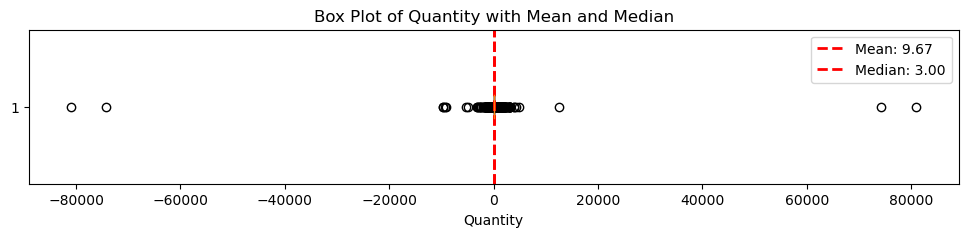

In [52]:
plt.figure(figsize=(12,2))
plt.boxplot(x=df['Quantity'], vert=False)
plt.axvline(mean_values, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_values:.2f}')
plt.axvline(median_values, color='r', linestyle='dashed', linewidth=2, label=f'Median: {median_values:.2f}')
plt.xlabel('Quantity')
plt.legend()
plt.title('Box Plot of Quantity with Mean and Median')
plt.show()

As shown above, there are some points that are far away from the red line/whiskers. Further, we call it as outliers. This box plot confirms also our statistical calculation from measurement of central tendendcy that also shows there is a skewsness / outliers.

### 4.2 Line plot: to know the monthly sales trend

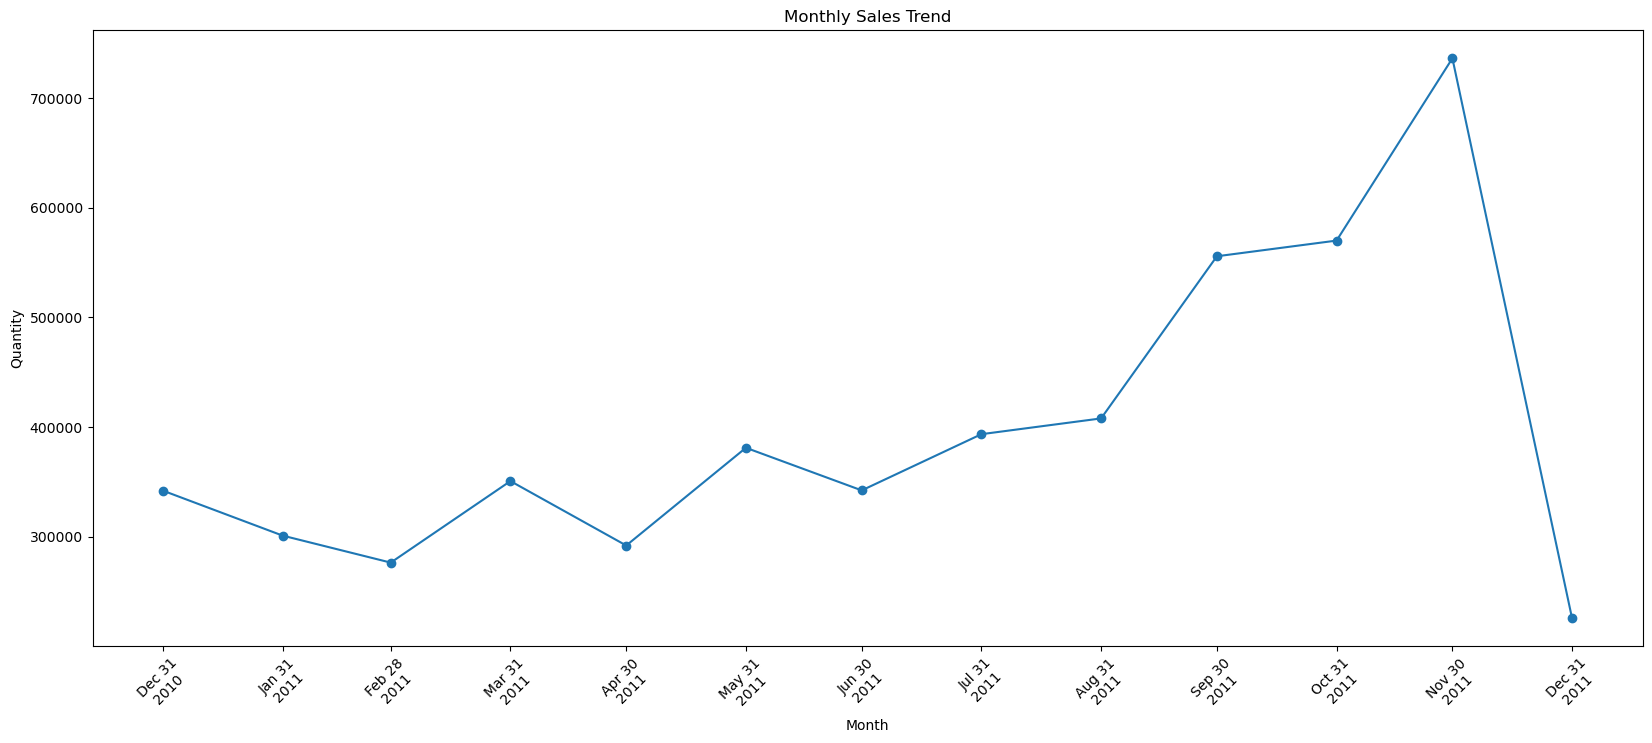

In [124]:
# Group by month and sum 'Total Price'
monthly_total_sold_items = df.resample('M', on='InvoiceDate')['Quantity'].sum()

# Plotting the line plot
plt.figure(figsize=(20, 8))
plt.plot(monthly_total_sold_items.index, monthly_total_sold_items.values, marker='o', linestyle='-')
plt.xticks(ticks=monthly_total_sold_items.index, labels=[x.strftime('%b %d\n%Y') for x in monthly_total_sold_items.index], rotation=45)
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.title('Monthly Sales Trend')
plt.show()

From the line plot above, we can conclude that the highest sale was on November 2011 and the lowest sale was on December 2011.
Here are some data-driven suggestions for the retail company:
1. Analyze the reason of high and low sell: by analyzing further the factors contributing to the high sell (for example: promotion, seasonal, product placement, marketing, customer preference, etc.) and also to the low sell (for example: lack of promotion and placement, high pricing, seasonal, etc.) it could help the company to make data-driven decision in the future.
2. Dynamic pricing: by knowing on which month the items being high sold and low sold, the company can use this data to adjust the pricing to gain more profits and sell.
3. Iventory management: the company would be able to know when to order / stock more product and when it is unnecessary.

### 4.3 Bar plot: to know the top-5 selling countries

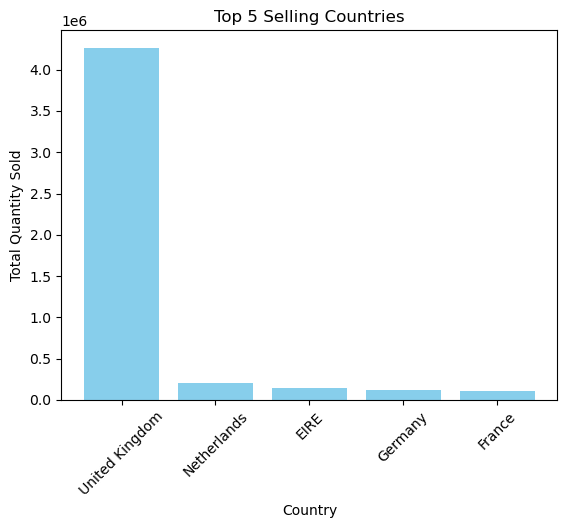

In [59]:
# calculate the total quantity for each country
country_sales = df.groupby('Country')['Quantity'].sum().reset_index()

# sorting the result from highest to lowest
country_sales_sorted = country_sales.sort_values(by='Quantity', ascending=False).head(5)

#plot the graph
bars = plt.bar(country_sales_sorted['Country'], country_sales_sorted['Quantity'], color='skyblue')

plt.xlabel("Country")
plt.ylabel("Total Quantity Sold")
plt.title("Top 5 Selling Countries")
plt.xticks(rotation=45)
plt.show()

From the bar plot above, we can see the top 5 selling countries with United Kingdom being in the first place.
Here are some data-driven suggestions for the retail company:
1. Targeted marketing campaigns: create marketing campaign that is tailored to the culture, language, public holiday, and customer behavior on that specific country to gain more profit.
2. Supply chain optimization: the company would be able to know where they need to stock their product the most. The company could also establish a partnership with local logistic provider to provide even faster shippment.
3. Market research and analysis: the company would be able to do market research on the country where the products are not really great sold to know the reason and buying behavior from the customers. Then, the result can be used to improve the selling strategy for that specific country.

### 4.4 Pie chart: to know the top-5 selling products

The Top-5 Selling Products
     StockCode  Quantity
1037     22197     56427
2574     84077     53751
3559    85099B     47260
3570    85123A     38811
2679     84879     36122


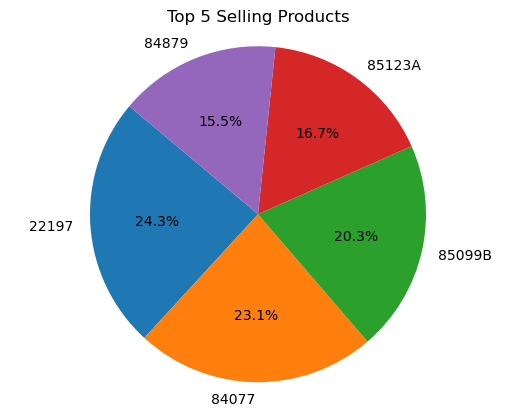

In [79]:
# calculate the total quantity for each stock code
product_sales = df.groupby('StockCode')['Quantity'].sum().reset_index()

# sorting the total quantity from highest to lowest
product_sales_sorted = product_sales.sort_values(by='Quantity', ascending=False).head(5)

print("The Top-5 Selling Products")
print(product_sales_sorted)

# plot the graph
plt.pie(product_sales_sorted['Quantity'], labels=product_sales_sorted['StockCode'].astype(str), autopct='%.1f%%', startangle=140)
plt.title('Top 5 Selling Products')
plt.axis('equal')
plt.show()

As shown from the pie chart above, there are top 5 selling products with Product code 22197 being the top sold products among others.
Here are some data-driven suggestions for the retail company:
1. Stock optimazation: the company should make sure that these top 5 selling products are always instock and avoid stockouts, that can lead to lost sales.
2. Supplier relationship: the company could deal with the supplier from these 5 top selling products for a better agreement to get better prices, payment terms and shippment.
3. Product expansion: the company could try to sell some more of varations from these 5 top selling products to get better sales and engage more customers.

### 4.5 Bar plot: to know top-10 customers

The Top-10 Customer Purchase
      CustomerID  Quantity
1703     14646.0    196719
55       12415.0     77242
1895     14911.0     77155
3758     17450.0     69009
4233     18102.0     64122
3801     17511.0     63012
1005     13694.0     61899
1447     14298.0     58021
1345     14156.0     56908
3202     16684.0     49390


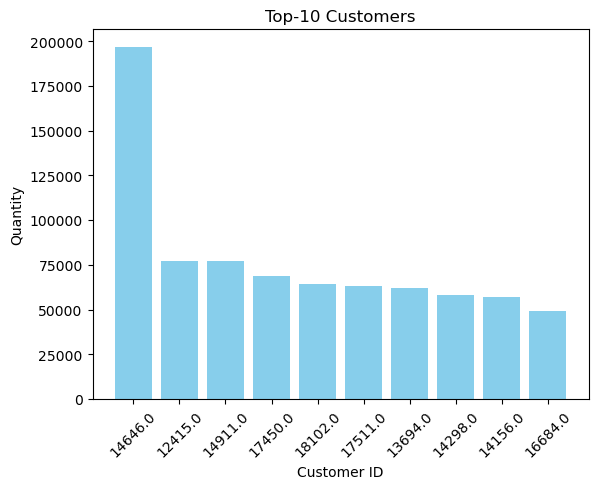

In [118]:
# filter our CustomerID -1.0 as we used it to fill it missing values 
filtered_df = df[df['CustomerID'] != -1.0]

# calculate total quantity for each customers
customer_sales = filtered_df.groupby('CustomerID')['Quantity'].sum().reset_index()

# sorting the customers
customer_sales_sorted = customer_sales.sort_values(by='Quantity', ascending=False).head(10)

print("The Top-10 Customer Purchase")
print(customer_sales_sorted)

# plot the graph
plt.bar(customer_sales_sorted['CustomerID'].astype(str), customer_sales_sorted['Quantity'], color='SkyBlue')
plt.title("Top-10 Customers")
plt.xlabel("Customer ID")
plt.ylabel("Quantity")
plt.xticks(rotation=45)
plt.show()

Refering to the bar plot above, we can conclude that customer with CustomerID 14646 is the most spender in the retail company.
Here are some data-driven suggestions for the retail company:
1. Customer segementation: identify these top-10 customers as VIPs and offer them special benefits such as discounts, early access to new products, or personalized promotions.
2. Customer service: enhance the customer experience, especially for these top customers, for example: special return terms, etc.

## 5. Further Analysis of Outliers

After performing basic statistic to our data frame and also visualize it, it was found that the data in column 'Quantity' has some outliers. In this section, the outliers will be further analyzed with the following steps:
- 5.1 Identifying outliers using Z-test
- 5.2 Analyze the dataset with and without the outliers

### 5.1 Identifying outliers using Z-Test

Number of outliers based on z-test: 657
Number of non-outliers based on z-test: 534530


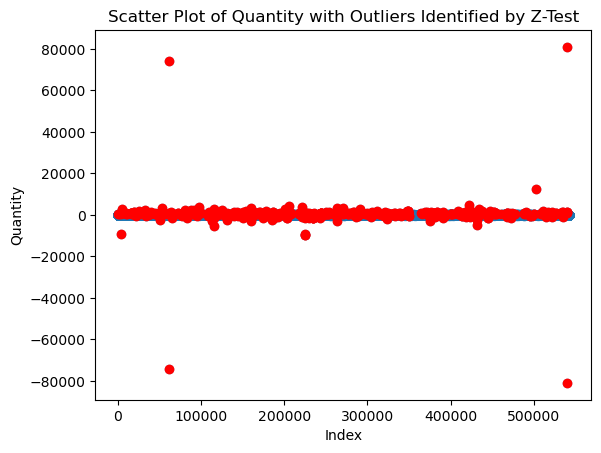

In [130]:
mean_quantity = df['Quantity'].mean()
std_quantity = df['Quantity'].std()

# calculate the z-score
df['z_score'] = (df['Quantity'] - mean_totalprice) / std_totalprice

# define significance level
z_threshold = 1.96

# identify outliers
outliers_ztest = df[np.abs(df['z_score']) > z_threshold]
non_outliers_ztest = df[np.abs(df['z_score']) <= z_threshold]

print(f"Number of outliers based on z-test: {outliers_ztest.shape[0]}")
print(f"Number of non-outliers based on z-test: {non_outliers_ztest.shape[0]}")

# plot the visualize
plt.scatter(df.index, df['Quantity'], alpha=0.5, label='Data Points')
plt.scatter(outliers_ztest.index, outliers_ztest['Quantity'], color='red', label='Outliers')
plt.title('Scatter Plot of Quantity with Outliers Identified by Z-Test')
plt.xlabel('Index')
plt.ylabel('Quantity')
plt.show()

### 5.2 Analyze the dataset with and without the outliers

In [134]:
# removing the outliers from the dataset
df_no_outliers = df[np.abs(df['z_score'])<= z_threshold]

# summary statistic of 'Total Price' without outliers
print("Statistic Summary of Column 'Quantity' without Outliers")
print(df_no_outliers['Quantity'].describe())

print("\nStatistic Summary of Column 'Quantity' including Outliers")
print(df['Quantity'].describe())

Statistic Summary of Column 'Quantity' without Outliers
count    534530.000000
mean          9.113984
std          22.504715
min        -413.000000
25%           1.000000
50%           3.000000
75%          10.000000
max         432.000000
Name: Quantity, dtype: float64

Statistic Summary of Column 'Quantity' including Outliers
count    535187.000000
mean          9.671593
std         219.059056
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64


- Mean and Standard Deviation:
  The mean 'Quantity' is slightly higher when outliers are included. This indicates that the outliers have a positive effect on the mean, pulling it higher.
  The standard deviation is significantly larger when outliers are included, indicating that there is a much larger spread in the data when outliers are present.

- Minimum and Maximum Values:
  The minimum and maximum values are drastically different when outliers are included. The extreme values (both positive and negative) in the data are contributing to the high standard deviation and range when outliers are present.
  
- Percentiles (25%, 50%, 75%):
  The 25th, 50th, and 75th percentiles are very similar in both cases. This indicates that the central tendency and the distribution around the median are not heavily influenced by the outliers.

- __Impact of Outliers__:
  The presence of extreme outliers significantly affects the mean and standard deviation, making the data more spread out and less representative of the typical values in the dataset.

## 6. Summary

After conducting data cleaning, basic statistic and data visualizations to the data set, some valuable insights and the corresponding data-driven suggestions were found. Below is the summary of this project:
1. After conducting basic statistic, measurement of central tendency and dispersion of the raw dataset, it is concluded that there is a presence of outliers. Further, this was confirmed and visualized by using box plot.
2. The monthly trend sales were presented in line plot. From this line plot, we found that November 2011 had the top-sales and December 2011 had the lowest sales. Moreover, some actions were suggested, such as: analyze further the month of highest and lowest sales, inventory management, and dynamic pricing.
3. The top-5 selling countries were presented in bar plot. From this bar plot, we found that United Kingdom is the top selling country among others. Moreover, some actions were suggested, such as: targeted marketing campaigns, supply chain optimazation, and market research and analysis.
4. The top-5 selling products were presented in pie chart. From this pie chart, we found that product with stock code 22197 was the most sold item. Moreover, some actions were suggested, such as: stock optimazation, supplier relationship, and product expansion.
5. The top-10 customers were presented in bar plot. From this bar plot, we found that customer with customer ID 14646 was the most spender in this retail company. Moreover, some actions were suggested, such as: customers segmentation and customer service.
6. Lastly, a further analysis of outliers was conducted by comparing the data with and without outliers. It was concluded that the presence of outliers impact to the mean and standard deviation values. Furthermore, this makes the data more spread out and less representative to the dataset.